In [56]:
import pandas as pd
import numpy as np
import trimesh

from scipy.spatial import ConvexHull
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import igl

from ghcn_helper import *


In [57]:
date_start, date_end = "20180101", "20181231"
yearbook = build_yearbook(date_start, date_end, ["TMAX", "TMIN"])
persistent_stations = find_persistent_stations(date_start, date_end, yearbook)
all_stations = find_all_stations(date_start, date_end, yearbook)


Found 4968 persistent stations in date range 20180101-20181231
After removing dups:  4968
Found 14046 stations in total in date range 20180101-20181231
After removing dups:  14046


In [58]:
df = all_stations


In [59]:
threshold = 0.01
df = pre_coarsen(df, threshold)


0-th removed point has nearest dist 0.0
1-th removed point has nearest dist 0.0
2-th removed point has nearest dist 0.0
3-th removed point has nearest dist 0.0
4-th removed point has nearest dist 0.0
5-th removed point has nearest dist 0.0
6-th removed point has nearest dist 0.0
7-th removed point has nearest dist 0.0
8-th removed point has nearest dist 0.0
9-th removed point has nearest dist 0.0
10-th removed point has nearest dist 0.0
11-th removed point has nearest dist 0.0
12-th removed point has nearest dist 0.0
13-th removed point has nearest dist 0.0
14-th removed point has nearest dist 0.0
15-th removed point has nearest dist 0.0
16-th removed point has nearest dist 0.0
17-th removed point has nearest dist 0.0
18-th removed point has nearest dist 0.0
19-th removed point has nearest dist 0.0
20-th removed point has nearest dist 0.0
21-th removed point has nearest dist 0.0
22-th removed point has nearest dist 0.0
23-th removed point has nearest dist 0.0
24-th removed point has ne

In [60]:
points = df2points(df)
points = points.T
points.shape


(13906, 3)

In [61]:
# ch = ConvexHull(ps_points)
ch = ConvexHull(points)

V = ch.points
F = ch.simplices
mesh = trimesh.Trimesh(vertices=V, faces=F, process=False)
assert mesh.is_watertight
assert mesh.euler_number == 2
mesh.show()
# mesh.export("persistent_stations.obj")


/Users/dwd/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [62]:
from ghcn_train_helper import *
import time

N=10
start = time.time()
for _ in range(N):
    L, M = compute_cotan_laplacian(points)
end = time.time()
print("time taken: ", (end - start)/N)


time taken:  0.13270561695098876


(array([1809., 2394., 1914., 1282.,  828.,  470.,  340.,  263.,  192.,
        4414.]),
 array([7.00082652e-08, 1.00630074e-05, 2.00560066e-05, 3.00490058e-05,
        4.00420050e-05, 5.00350041e-05, 6.00280033e-05, 7.00210025e-05,
        8.00140017e-05, 9.00070008e-05, 1.00000000e-04]),
 <a list of 10 Patch objects>)

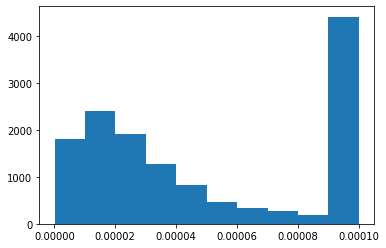

In [63]:
diag = M.diagonal()
clip_max = 0.0001
diag = np.clip(diag, a_min=0, a_max=clip_max)
# plt.xscale("log")
plt.hist(diag)


In [65]:
lmax = compute_lmax(df)
lmax


Successfully converged after 118 steps
Difference between ML @ v and lambda * v:  6.954127166805209


179267092.58553785

In [ ]:
4596912090.849968